## Linear Regression

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

### Closed Form

In [39]:
# example how concatenate to arrays next to each other
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [8]:
X_b = np.c_[np.ones((100, 1)), X]

In [9]:
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [10]:
theta

array([[4.21509616],
       [2.77011339]])

In [11]:
X_new = np.array([[0], [2]])

In [12]:
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [14]:
y_predict = X_new_b.dot(theta)

In [15]:
y_predict

array([[4.21509616],
       [9.75532293]])

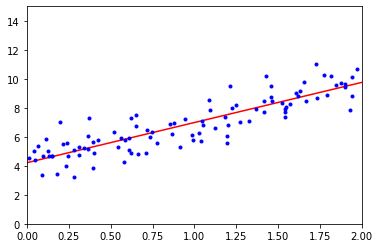

In [16]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### LinearRegression() with least squares (pseudoinverse)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lin_reg = LinearRegression()

In [21]:
lin_reg.fit(X, y)

LinearRegression()

In [25]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [26]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

### Linear Regression with GD

In [49]:
lr = 0.4
n_iter = 1000
m = 100

In [50]:
theta = np.random.rand(2,1); theta

array([[0.28077236],
       [0.02431597]])

In [51]:
for i in range(n_iter):
    grads = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - lr* grads

In [52]:
theta

array([[4.21509616],
       [2.77011339]])

In [60]:
from sklearn.linear_model import SGDRegressor

In [61]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

In [69]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [70]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.23420989]), array([2.81364264]))

## Polynomial Regression

In [71]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [72]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [75]:
X_poly = poly_features.fit_transform(X)

In [76]:
X[0]

array([-0.7790478])

In [77]:
X_poly[0]

array([-0.7790478 ,  0.60691547])

In [78]:
lin_reg_poly = LinearRegression()

In [79]:
lin_reg_poly.fit(X_poly, y.ravel())


LinearRegression()

In [80]:
lin_reg_poly.intercept_, lin_reg_poly.coef_

(2.356397752162642, array([1.04074017, 0.45236718]))

In [82]:
# original equation
# y = 0.5x[1]*2 + 1.0x[1] + 2.0 + Gaussian noise

In [84]:
# predicted equation
# y = 0.45x[1]*2 + 1.04x[1] + 2.356397

## Learning Curves

In [85]:
from sklearn.linear_model import Ridge

In [86]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [87]:
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')